In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv("economic_index.csv")
print(df.head())

df.drop(columns=["Unnamed: 0","year","month"],inplace=True) #dropping unnecessary columns
print("\ndf after drop:\n",df.head())


   Unnamed: 0  year  month  interest_rate  unemployment_rate  index_price
0           0  2017     12           2.75                5.3         1464
1           1  2017     11           2.50                5.3         1394
2           2  2017     10           2.50                5.3         1357
3           3  2017      9           2.50                5.3         1293
4           4  2017      8           2.50                5.4         1256

df after drop:
    interest_rate  unemployment_rate  index_price
0           2.75                5.3         1464
1           2.50                5.3         1394
2           2.50                5.3         1357
3           2.50                5.3         1293
4           2.50                5.4         1256


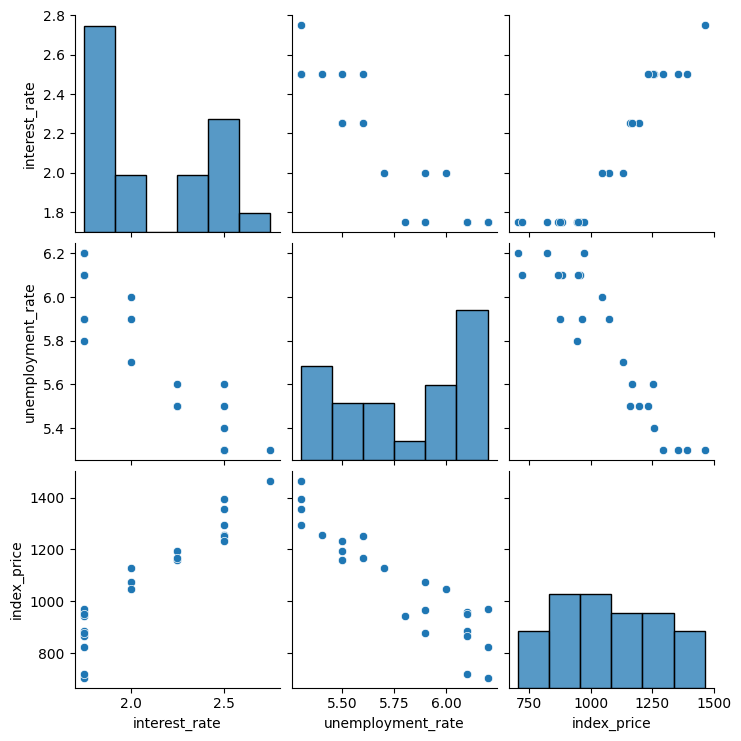

In [8]:
import seaborn as sns 
sns.pairplot(df)


In [9]:
df.corr() # checking direct and indirect correlation between features

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


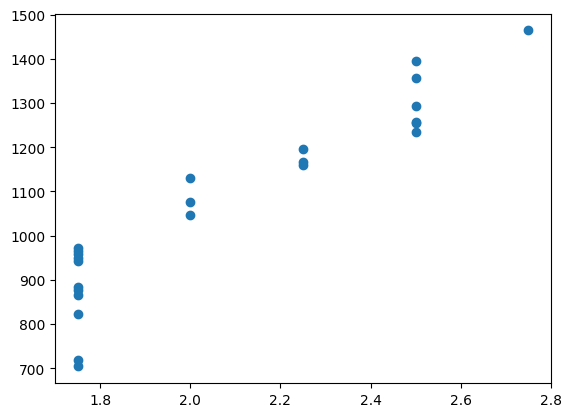

In [10]:
plt.scatter(df["interest_rate"],df["index_price"])

<Axes: xlabel='interest_rate', ylabel='index_price'>

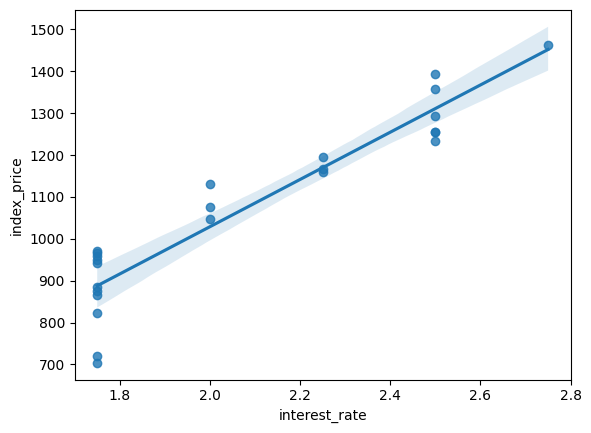

In [11]:
sns.regplot(x=df["interest_rate"],y=df["index_price"]) #regression line

In [12]:
# defining the independent and dependent features 
X=df[["interest_rate","unemployment_rate"]]
y=df[["index_price"]]



In [13]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [14]:
#standardrization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



In [15]:
 # model selection
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X_train,y_train)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
from sklearn.model_selection import cross_val_score
validation=cross_val_score(model,X_train,y_train,scoring="neg_mean_squared_error",
                cv=3)

In [17]:
np.mean(validation)

np.float64(-5914.828180162386)

In [18]:
#prediction
prediction=model.predict(X_test)
print(prediction)
#inverse transform
print(scaler.inverse_transform(X_test))


[[1204.22770398]
 [ 821.65051903]
 [1406.51300368]
 [ 857.70889608]
 [ 994.90992298]
 [1168.16932693]]
[[2.25 5.5 ]
 [1.75 6.2 ]
 [2.75 5.3 ]
 [1.75 6.1 ]
 [2.   5.9 ]
 [2.25 5.6 ]]


In [28]:
#ols linear regression model
import statsmodels.api as sm
ols_model=sm.OLS(y_train,X_train).fit()



In [29]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 28 Jan 2026   Prob (F-statistic):                       0.754
Time:                        23:25:24   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""